# Introduction to GeoData

## Outline

* Introduction to GeoData
    * GeoData
    * Maps
    * Shapes
    * Coordinate reference systems and projections
    * Software
 
* Geoformats

* Data Sources
    
* Python ecosystem
    * Folium
    * Shapely
    * GeoPandas


## Definitions

In [1]:
%run "C:\Users\OP3202\Documents\Git\PythonDataIES\auth.py"
tokens = ['GOOGLE_MAPS_API_KEY','FOURSQUARE_CLIENT_ID','FOURSQUARE_CLIENT_SECRET','GOLEMIO_API_KEY','MAPBOX_ACCESS_TOKEN']
if any([token not in globals() for token in tokens]):
    print('At least one of the required API KEYs or access tokens is not available. Please make sure that you have all of the following:')
    [print(token) for token in tokens]

%load_ext autoreload
%autoreload 2

%matplotlib inline
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import *
from load_data import *

## Introduction to GeoData

### GeoData (and maps)

`Data containing some geographical information - coordinates, locations etc.`

![raster_vector.png](raster_vector.png)

See **Mapbox**:
* [Example 1](http://vitekzkytek.cz/PosterMaps)
* [Example 2](http://vitekzkytek.cz/BrownfieldMap)
* [Mapbox Studio](https://studio.mapbox.com/)

# NO FLAT EARTH

### Coordinate Reference Systems (CRS)
* most often GPS coordinates, but also adresses

![Mercator_projection_660.jpg](Mercator_projection_660.jpg)

### Flight Route Paradox

Curved flights routes      | Or straight?   
:-------------------------:|:-------------------------:
![](flightroute1.png)      |  ![](flightroute2.png)


Solution? =>
### Projections
Enforcing plane, in what cannot be further from it

* location on Earth => location on map

* function

See [projection transitions](https://bl.ocks.org/mbostock/3711652): 
Several examples:



### [EPSG](http://www.epsg.io) Standard 

1. Standard GPS (EPSG=4326)

2. Web mercator (EPSG=3857)


### Coordinate reference systems 
closely connected to projections

1. GPS in degrees

2. Web Mercator in meters 

### Software
* GIS - ArcGis, QGIS (OpenSource)
* Databases - PostGIS
* Python

### Formats 
* Addresses
* CSV with GPS
* GeoJSON
* Shapefiles
many more


### Let's get some data 

In [2]:
IES_LOC = (50.082092, 14.431176)
TUCNAK_LOC = (50.085029, 14.427777)

In [3]:
beers = get_foursquare_data('beer',IES_LOC,FOURSQUARE_CLIENT_ID,FOURSQUARE_CLIENT_SECRET)
beers.head()

,id,name,lat,lng,address,distance_ies,category,geometry
0,5be4a2becbcdee002cedb675,Swim,50.079827,14.426087,Štěpánská 622/36,442,Bar,POINT (14.42609 50.07983)
1,554219d8498e5c23e728d00e,Meat & Greet,50.085919,14.429909,Senovážné náměstí 2,435,Burger Joint,POINT (14.42991 50.08592)
2,4bb226b2f964a520c7bd3ce3,Kino Světozor Bar,50.081909,14.424922,Vodičkova 41,447,Bar,POINT (14.42492 50.08191)
3,4b76bac3f964a5201f5b2ee3,U Pinkasů,50.083234,14.423501,Jungmannovo nám. 15/16,562,Beer Garden,POINT (14.42350 50.08323)
4,5c55dd35b54618002c1a34c6,Cartel Lounge,50.076986,14.430605,Legerova 616/78,569,Bar,POINT (14.43061 50.07699)


### Geometries

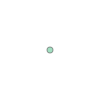

In [4]:
Point(IES_LOC[::-1])

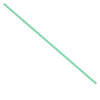

In [5]:
LineString([IES_LOC[::-1],TUCNAK_LOC[::-1]])

![image.png](geometries.png)
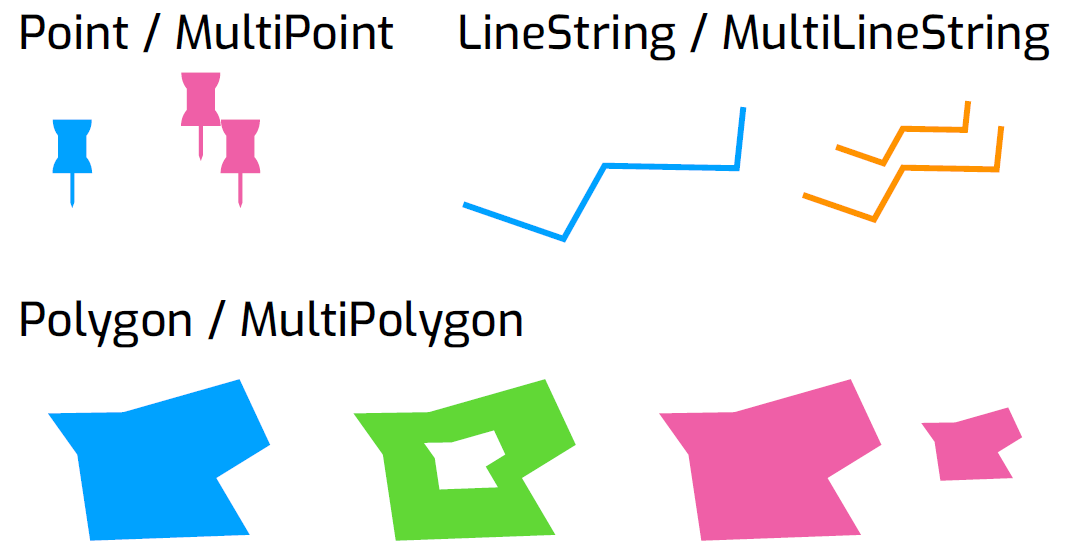

### Basic Map Visualization

* TODO: doresit range na foursquare plus ho ukazat na mape

In [6]:
import folium

m = folium.Map(IES_LOC,
                  zoom_start=14,
                   tiles='Stamen Toner')
folium.CircleMarker(
    IES_LOC,
    popup='IES'
).add_to(m)

folium.CircleMarker(
    TUCNAK_LOC,
    popup='IES',
    color='red'
).add_to(m)

for _,row in beers.iterrows():
    folium.Marker(
        [row.lat,row.lng],
        popup=row['name']
    ).add_to(m)
m

## Around IES

In [7]:
IES_POINT = Point(IES_LOC[::-1])
buffer = IES_POINT.buffer(0.02)

In [8]:
bounds = buffer.bounds
atms =  get_overpass_amenity('atm',bounds)
atms.head()

,amenity,created_by,operator,id,lat,lon,geometry,source,wheelchair,name,...,source:addr,source:loc,atm:bitcoin,currency:EUR,FIXME,cash_in,drive_through,currency:USD,wireless,wheelchair:description
0,atm,JOSM,ČSOB,264838978,50.100599,14.446329,POINT (14.44633 50.10060),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,atm,NaN,Česká Spořitelna,282096323,50.074121,14.418575,POINT (14.41858 50.07412),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,atm,NaN,Raiffeisenbank,282096902,50.075562,14.418857,POINT (14.41886 50.07556),survey,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,atm,NaN,Unicreditbank,282096903,50.075189,14.418732,POINT (14.41873 50.07519),survey,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,atm,NaN,Česká Spořitelna,282546217,50.091231,14.438449,POINT (14.43845 50.09123),NaN,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Nearest Public Transport

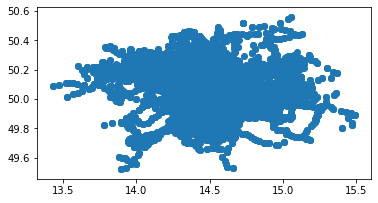

In [9]:
stops = get_all_stops(GOLEMIO_API_KEY)
stops.plot()

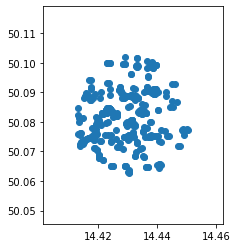

In [10]:
stops_ies = stops[stops.geometry.apply(lambda p:p.within(buffer))]
stops_ies.plot()

C:\Users\OP3202\.conda\envs\jupyter\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


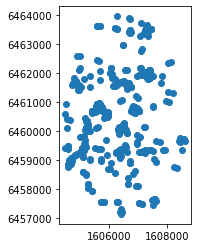

In [11]:
stops_ies.to_crs(epsg=3857).plot()

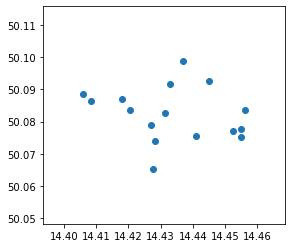

In [12]:
police = get_police_stations(IES_LOC,2000,GOLEMIO_API_KEY)
police.plot()

In [13]:
m = folium.Map(IES_LOC,
                  zoom_start=14,
                   tiles='Stamen Toner')
folium.CircleMarker(
    IES_LOC,
    color='red',
    popup='IES'
).add_to(m)
folium.CircleMarker(
    TUCNAK_LOC,
    color='red',
    popup='Tučňák'
).add_to(m)


for _,row in beers.iterrows():
    folium.Marker(
        [row.lat,row.lng],
        popup=row['name']
    ).add_to(m)
    
for _,row in stops_ies.iterrows():
    folium.CircleMarker(
        [row.stop_lat,row.stop_lon],
        color='blue',
        #popup=row['name']
    ).add_to(m)

for _,row in atms.iterrows():
    folium.CircleMarker(
        [row.lat,row.lon],
        color='green',
        #popup=row['name']
    ).add_to(m)

for _,row in police.iterrows():
    coords = row.geometry.coords[0]
    folium.CircleMarker(
        [coords[1],coords[0]],
        color='orange',
        #popup=row['name']
    ).add_to(m)
m

## Get Nearest Points

In [14]:
from shapely.ops import nearest_points
# unary union of the gpd2 geomtries 

atms_union = atms.geometry.unary_union
police_union = police.geometry.unary_union
stops_union = stops_ies.geometry.unary_union

def distance_to_nearest(point, union,elements):
     # find the nearest point and return the corresponding Place value
    nearest = nearest_points(point, union)
    return nearest[0].distance(nearest[1])

beers['nearest_atm'] = beers.apply(lambda row: distance_to_nearest(row.geometry,atms_union,atms), axis=1)
beers['nearest_police'] = beers.apply(lambda row: distance_to_nearest(row.geometry,police_union,police), axis=1)
beers['nearest_stop'] = beers.apply(lambda row: distance_to_nearest(row.geometry,stops_union,stops_ies), axis=1)

In [15]:
beers[[col for col in beers.columns if col.startswith('nearest')]].head()

,nearest_atm,nearest_police,nearest_stop
0,0.001309,0.001241,0.002012
1,0.002035,0.003604,0.000876
2,0.000624,0.003604,0.000431
3,0.000461,0.003095,0.000118
4,0.001332,0.003665,0.001383


In [16]:
def distance_to_nearest_meters(geos1,geos2):
    geos1m = geos1.to_crs(epsg=3857)
    geos2m = geos2.to_crs(epsg=3857)
    
    geos2m_union = geos2m.unary_union
    
    def distance_to_nearest(point, union,elements):
         # find the nearest point and return the corresponding Place value
        nearest = nearest_points(point, union)
        return nearest[0].distance(nearest[1])
    return geos1m.apply(lambda row: distance_to_nearest(row,geos2m_union,geos2m))
beers['nearest_atm'] = distance_to_nearest_meters(beers.geometry,atms.geometry)
beers['nearest_police'] = distance_to_nearest_meters(beers.geometry,police.geometry)
beers['nearest_stop'] = distance_to_nearest_meters(beers.geometry,stops_ies.geometry)

C:\Users\OP3202\.conda\envs\jupyter\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\OP3202\.conda\envs\jupyter\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\OP3202\.conda\envs\jupyter\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\OP3202\.conda\envs\jupyter\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\OP3202\.con

In [17]:
beers[[col for col in beers.columns if col.startswith('nearest')]].head()

,nearest_atm,nearest_police,nearest_stop
0,211.837344,183.864024,298.052422
1,230.440317,591.204828,142.157691
2,81.528055,565.388659,57.553302
3,70.765176,347.586088,20.259367
4,174.397894,528.651881,169.704772


### Google Maps - Travelling distances

In [18]:
import googlemaps
gmaps = googlemaps.Client(key=GOOGLE_MAPS_API_KEY)

In [19]:
dm = gmaps.distance_matrix(
    origins='|'.join(['{lat},{lng}'.format(**beer) for _,beer in beers.iterrows()]),
    destinations=','.join([str(coord) for coord in TUCNAK_LOC]),
    mode='walking',#or 'driving' or 'transit' or 'bicycling'
    units='metric'
)

In [20]:
dists = pd.DataFrame([{
    'tucnak_distance':row['elements'][0]['distance']['value'],
    'tucnak_duration':row['elements'][0]['duration']['value']/60    
} for row in dm['rows']],index=beers.name)

beers = beers.merge(dists,left_on='name',right_index=True)

In [21]:
beers.head()

,id,name,lat,lng,address,distance_ies,category,geometry,nearest_atm,nearest_police,nearest_stop,tucnak_distance,tucnak_duration
0,5be4a2becbcdee002cedb675,Swim,50.079827,14.426087,Štěpánská 622/36,442,Bar,POINT (14.42609 50.07983),211.837344,183.864024,298.052422,737,8.766667
1,554219d8498e5c23e728d00e,Meat & Greet,50.085919,14.429909,Senovážné náměstí 2,435,Burger Joint,POINT (14.42991 50.08592),230.440317,591.204828,142.157691,340,4.133333
2,4bb226b2f964a520c7bd3ce3,Kino Světozor Bar,50.081909,14.424922,Vodičkova 41,447,Bar,POINT (14.42492 50.08191),81.528055,565.388659,57.553302,547,6.633333
3,4b76bac3f964a5201f5b2ee3,U Pinkasů,50.083234,14.423501,Jungmannovo nám. 15/16,562,Beer Garden,POINT (14.42350 50.08323),70.765176,347.586088,20.259367,534,6.366667
4,5c55dd35b54618002c1a34c6,Cartel Lounge,50.076986,14.430605,Legerova 616/78,569,Bar,POINT (14.43061 50.07699),174.397894,528.651881,169.704772,1157,13.633333


## Dashboard

In [22]:
from bokeh.plotting import figure, show, output_notebook,gmap,output_file
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource,GMapOptions,HoverTool,Slider,CustomJS, CustomJSFilter,CDSView
from bokeh.layouts import column, row, widgetbox

output_notebook()
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

source = ColumnDataSource(beers.drop('geometry',axis=1))

map_options = GMapOptions(lat=50.08, lng=14.43, map_type="roadmap", zoom=14)
p = gmap(GOOGLE_MAPS_API_KEY, map_options, title="Pubs in Prague")

# Add hover tool
p.add_tools(HoverTool(tooltips = [
    ('Name','@name'),
    ('Distance to IES','@distance_ies'),
    ('Distance to ATM','@nearest_atm'),
    ('Distance to Stops','@nearest_stop'),
    ('Distance to Police','@nearest_police'),
    ('Distance to Tučňák','@tucnak_distance')

]))


def addFilterSlider(title,start,end,step,source,colname,sliderType):
    slider = Slider(title = title, 
                    start = start, end = end, 
                    step = step, value = end if sliderType=='max' else start)

    # This callback triggers the filter when the slider changes
    callback = CustomJS(args = dict(source=source), 
                        code = 'source.change.emit();')
    
    if sliderType == 'max':
        sign = '<='
    elif sliderType == 'min':
        sign = '>='
    elif sliderType == 'eq':
        sign = '=='
    else:
        return 'ERROR!, UNKNOWN SIGN!'
    slider.js_on_change('value', callback)
    # Creates custom filter that selects the rows of the month based on the value in the slider
    custom_filter = CustomJSFilter(args = dict(slider = slider, 
                                               source = source), 
                                   code = '''
            var indices = [];
            // iterate through rows of data source and see if each satisfies some constraint
            for (var i = 0; i < source.get_length(); i++){{
             if (source.data['{}'][i] {} slider.value){{
             indices.push(true);
             }} else {{
             indices.push(false);
             }}
            }}
            return indices;
            '''.format(colname,sign))
    return slider,custom_filter

ies_dist_slider, ies_dist_filter = addFilterSlider('Distance to IES (meters; max)',0,beers.distance_ies.max(),50,source,'distance_ies','max')
tucnak_dist_slider, tucnak_dist_filter = addFilterSlider('Walking Distance to Tučňák (minutes; max)',0,beers.tucnak_duration.max(),1,source,'tucnak_duration','max')

atm_dist_slider, atm_dist_filter = addFilterSlider('Nearest ATM (meters; max)',0,beers.nearest_atm.max(),50,source,'nearest_atm','max')
stop_dist_slider, stop_dist_filter = addFilterSlider('Nearest stop (meters; max)',0,beers.nearest_stop.max(),50,source,'nearest_stop','max')
police_dist_slider, police_dist_filter = addFilterSlider('Nearest police (meters; min)',0,beers.nearest_police.max(),50,source,'nearest_police','min')

# Uses custom_filter to determine which set of sites are visible
view = CDSView(source = source, filters = [ies_dist_filter,tucnak_dist_filter,atm_dist_filter,stop_dist_filter,police_dist_filter])
p.circle(x="lng", y="lat", size=15, fill_color="blue", fill_alpha=0.8, source=source,view=view)
layout = row(p, column(widgetbox(ies_dist_slider),widgetbox(tucnak_dist_slider),widgetbox(atm_dist_slider),widgetbox(stop_dist_slider),widgetbox(police_dist_slider)))

show(layout)


Loading BokehJS ...

## Mapbox Directions API

In [23]:
pub = beers[beers.name == 'Meet Beer']
atms['distance_to_ies'] = atms.geometry.apply(lambda atm: atm.distance(IES_POINT))

In [24]:
route = [IES_LOC,(float(pub.lat),float(pub.lng)),TUCNAK_LOC]
url = 'https://api.mapbox.com/directions/v5/mapbox/walking/{}.json?access_token={}&steps=true&geometries=polyline'.format(';'.join(['{},{}'.format(*place[::-1]) for place in route]),MAPBOX_ACCESS_TOKEN)
json_route = requests.get(url).json()

In [25]:
m = folium.Map(IES_LOC,
                  zoom_start=17,
                   tiles='Stamen Toner')
folium.PolyLine([step['intersections'][0]['location'][::-1] for leg in json_route['routes'][0]['legs'] for step in leg['steps']],weight=5,color='red').add_to(m)
folium.Marker(
    IES_LOC,
    popup='Here we are'
).add_to(m)
folium.Marker(
    [pub.lat,pub.lng],
    popup='Here we go: Meet Beer'
).add_to(m)
folium.Marker(
    TUCNAK_LOC,
    popup='And maybe to: Tučňák!!'
).add_to(m)

m